In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [5]:
import tensorflow as tf



In [6]:
np.random.seed(1337)  
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, GRU
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import imdb


In [7]:

max_features = 20000
# number of words in my vocabulary shouldn't be more than 200000
maxlen = 100  
print('Loading data...')

# this dataset is already pre processed 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


#### suppose this 
- r1 = I love this food 
- r2 = I hate this food
- r3 = This place is great

#### an index is given to each unique word 
- I -->0
- love -->1
- hate -->2
- this  -->3
- food -->4
- place -->5
- is -->6
- great -->7

#### the review is written as a numeric vector, using the indicies given to each to each unique word
- r1 = [0,1,3,4]
- r2 = [0,2,3,4]
- r3 = [3,5,6,7]

In [8]:
# length of 1st review, aka number of words 
len(X_train[1])

189

In [9]:

len(X_train[7])

562

In [10]:

X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [11]:


print('X_train shape(before pad_sequences): ', X_train.shape)
print('X_test shape(before pad_sequences): ', X_train.shape)

print("Pad sequences (samples x time)")

# as you can see in the output, the shape of X_train and X_test is 25000 reviews with 100 words each  
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

y_train = np.array(y_train)
y_test = np.array(y_test)

X_train shape(before pad_sequences):  (25000,)
X_test shape(before pad_sequences):  (25000,)
Pad sequences (samples x time)
X_train shape: (25000, 100)
X_test shape: (25000, 100)


# LSTM

In [12]:
layers = 128
dropout = 0.2
epochs = 3
batch_size = 128

In [13]:
tf.keras.layers.Embedding

keras.layers.core.embedding.Embedding

In [14]:
model = tf.keras.models.Sequential()
# embedding layer converts words into vectors 
model.add(tf.keras.layers.Embedding(max_features, 128, input_length=maxlen))
# then we put these 100 vectors into LSTM layers 
model.add(tf.keras.layers.LSTM(layers))
# LSTM will give you two vector outputs: C and H 
# we take only C and use C as the input for the next layer
model.add(tf.keras.layers.Dropout(dropout))
# then we have an output layer with a single node
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

2022-12-08 10:35:38.816506: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


#### While dealing with NLP problems, we can use pre-trained word embeddings such as GloVe.

In [15]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 150s 919ms/step - loss: 0.4603 - accuracy: 0.7691 - val_loss: 0.3678 - val_accuracy: 0.8398
Epoch 2/3
157/157 [==============================] - 76s 482ms/step - loss: 0.2450 - accuracy: 0.9054 - val_loss: 0.3610 - val_accuracy: 0.8486
Epoch 3/3
157/157 [==============================] - 92s 590ms/step - loss: 0.1527 - accuracy: 0.9445 - val_loss: 0.3914 - val_accuracy: 0.8424


In [16]:
# training data accuracy
acc = history.history['accuracy']
# training data loss
val_acc = history.history['val_accuracy']
# testing data accuracy
loss = history.history['loss']
# testing data loss 
val_loss = history.history['val_loss']



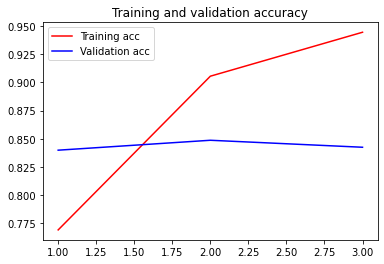

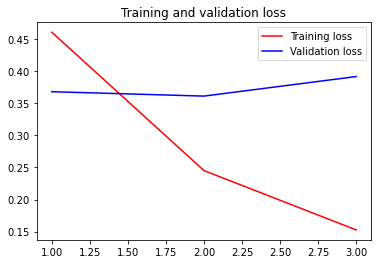

In [17]:
# plotting what training accuracy and testing accuracy looks like after each epoch 
# plotting what training loss and testing loss looks like after each epoch 
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc',color="red")
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss',color="red")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [18]:
score = model.evaluate(X_test, y_test)
score[1]

782/782 [==============================] - 45s 57ms/step - loss: 0.3986 - accuracy: 0.8350


0.8350399732589722

### Identifying which class the review belongs to

In [44]:
test_labels=y_test.tolist() 

In [45]:
def get_review_and_class(size):
  idx = np.random.randint(len(X_test), size=size) 
  for i in range(len(idx)):
    print(X_test[idx,:][i])
    if test_labels[idx[i]] == 1:
      print('This is a positive review!')
    elif test_labels[idx[i]] == 0:
      print('This is a negative review!')


In [46]:
get_review_and_class(25)  

[  242  1222  4891  3025 19113   320    11     4  4681    39    41  3731
    37  2171    12   103     4  3286   325   279    41  3731     9  7999
     5    14    16    96   103     4  3286   325     5   422   121    16
     4  9493    51  5204  2518    81   134    84   412    11    13   115
   181     8    67   160    20    15  8168    75    92    28  9493     5
     2     5     5   608   279   134    84    28     6   527     2     8
  4498  1636   120     4  1699    21    92   942    72     8   264   259
    11    14   559     7  4181  7293    15   294    43  4214    83   129
   113   209  2783    86]
This is a negative review!
[  389   228     5  3822  8879   769     4   167  1027    53    74    43
     8  2836     4    22   716     4    65     7     6 16029  3020   291
   154   625   846  2596     8    41    15    59    16  5374  1346   454
    35  6761    15   304    98    32    39  2853     8   325  3067     2
     2  1490  2057  1493    19  4442   139     7   567     2     8    9

# BLSTM

In [35]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
# change LSTM layer to Bidirectional LSTM 
model.add(Bidirectional(LSTM(layers)))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,823,425
Trainable params: 2,823,425
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 62s 378ms/step - loss: 0.4593 - accuracy: 0.7792 - val_loss: 0.3471 - val_accuracy: 0.8482
Epoch 2/3
157/157 [==============================] - 67s 424ms/step - loss: 0.2456 - accuracy: 0.9044 - val_loss: 0.3429 - val_accuracy: 0.8540
Epoch 3/3
157/157 [==============================] - 60s 381ms/step - loss: 0.1622 - accuracy: 0.9428 - val_loss: 0.4218 - val_accuracy: 0.8424


In [10]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 22s 886us/step


0.81904

# SimpleRNN

In [11]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))

# change LSTM to RNN 
model.add(SimpleRNN(layers)) 
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 19s 927us/step - loss: 0.6278 - acc: 0.6275 - val_loss: 0.5543 - val_acc: 0.7054
Epoch 2/3
20000/20000 [==============================] - 17s 867us/step - loss: 0.3938 - acc: 0.8298 - val_loss: 0.4116 - val_acc: 0.8196
Epoch 3/3
20000/20000 [==============================] - 17s 861us/step - loss: 0.2647 - acc: 0.8973 - val_loss: 0.4564 - val_acc: 0.8054


In [37]:
score = model.evaluate(X_test, y_test)
score[1]

782/782 [==============================] - 34s 43ms/step - loss: 0.4354 - accuracy: 0.8373


0.8372799754142761

# GRU

In [14]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
#change to GRU 
model.add(GRU(layers)) 
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 33s 2ms/step - loss: 0.4960 - acc: 0.7460 - val_loss: 0.4931 - val_acc: 0.8098
Epoch 2/3
20000/20000 [==============================] - 32s 2ms/step - loss: 0.2559 - acc: 0.8975 - val_loss: 0.4102 - val_acc: 0.8364
Epoch 3/3
20000/20000 [==============================] - 32s 2ms/step - loss: 0.1587 - acc: 0.9434 - val_loss: 0.4368 - val_acc: 0.8366


In [16]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 15s 591us/step


0.8364